![cg.jpg](https://raw.githubusercontent.com/jdanifalcon/FundamentosIA/main/logo/logo_cg.jpg)


# Tarea 2

#### @date 11/02/2024
#### @autor: Jessica Falcón

Resuelva los siguientes ejercicios mediante el desarrollo de algoritmos implementados en python:

1. Considere la imagen: ‘lenna_cb1.jpg’ para realizar lo siguiente:
a) Obtener el histograma de frecuencia.
b) Graficar la función de transferencia de acuerdo a la expresión:

$g(i, j)=[f (i, j)]^p$

en donde 0.0 ≤ f(i,j) ≤ 1.0 representa la imagen original y ‘p’ determina la potencia (p = 1).
c) Obtener el histograma de frecuencia de la imagen para p = 2 y p = 3, despliegue las imágenes
respectivas.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

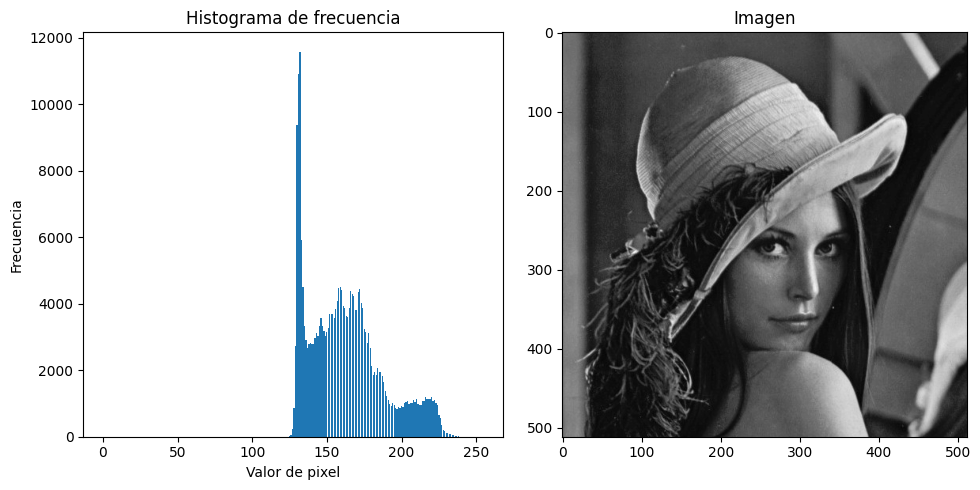

In [12]:
# Leer imagen
imagen = plt.imread('/content/lenna_cb1.jpg')

# Obtener histograma
histograma, bins = np.histogram(imagen.ravel(), 256, range=(0, 256))

# Crear una nueva figura con dos subgráficos uno al lado del otro
plt.figure(figsize=(10, 5))

# Subgráfico 1: Histograma
plt.subplot(1, 2, 1)
plt.bar(bins[:-1], histograma)
plt.xlabel('Valor de pixel')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencia')

# Subgráfico 2: Imagen
plt.subplot(1, 2, 2)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar la figura con los dos subgráficos
plt.show()

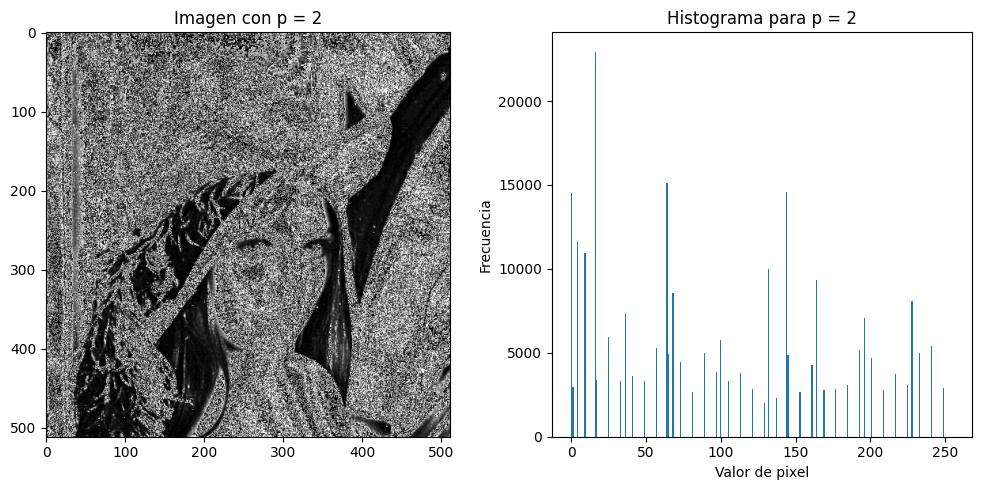

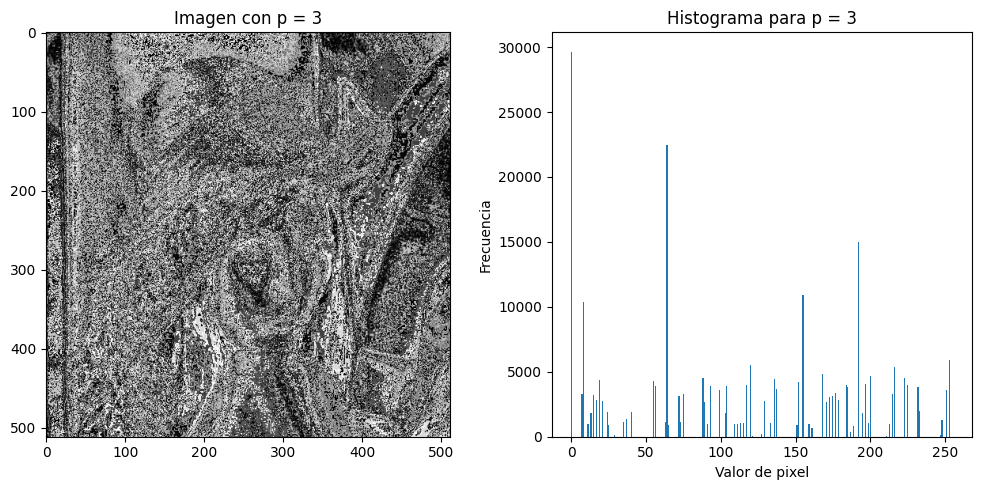

In [13]:
def funcion_transferencia(imagen, p):
    return np.power(imagen, p)

# Obtener histogramas y las imágenes transformadas
for p in [2, 3]:
    imagen_p = funcion_transferencia(imagen, p)
    histograma_p = np.histogram(imagen_p.ravel(), 256, range=(0, 256))[0]

    # Crear una nueva figura con dos subgráficos uno al lado del otro
    plt.figure(figsize=(10, 5))

    # Subgráfico 1: Imagen
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_p, cmap='gray')
    plt.title('Imagen con p = {}'.format(p))

    # Subgráfico 2: Histograma
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(256), histograma_p)
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')
    plt.title('Histograma para p = {}'.format(p))

    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()

    # Mostrar la figura con los dos subgráficos
    plt.show()

2. Obtener la anulación de ruido del tipo Gaussiano con media ‘cero’ agregado en cada imagen, dado un dataset de imágenes del mismo tamaño y alineadas espacialmente mediante el promediado de imágenes (4, 8 y 16) en escala de grises y calcular la relación de potencia señal a ruidorespectivo.

In [14]:
# Leer imagen original
imagen_original = plt.imread('/content/lenna_cb1.jpg')

# Parámetros
sigma_min = 5  # Desviación estándar mínima del ruido
sigma_max = 50  # Desviación estándar máxima del ruido
num_imagenes = 10  # Número de imágenes a generar

# Generar imágenes con ruido
imagenes_ruidosas = []
for sigma in np.linspace(sigma_min, sigma_max, num_imagenes):
    imagen_ruidosa = imagen_original + np.random.normal(0, sigma, imagen_original.shape)
    imagenes_ruidosas.append(imagen_ruidosa)

# Guardar dataset como archivo .npy
np.save('dataset_imagenes.npy', imagenes_ruidosas)

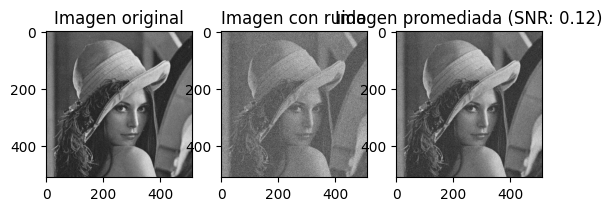

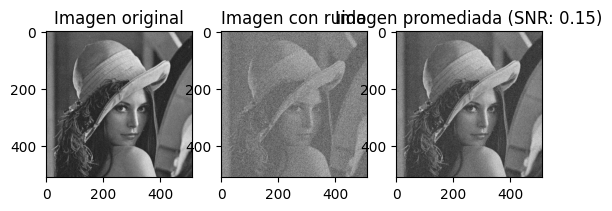

IndexError: index 10 is out of bounds for axis 0 with size 10

In [15]:
# Cargar dataset
dataset = np.load('/content/dataset_imagenes.npy')

# Parámetros
sigma = 10  # Desviación estándar del ruido
kernel_size = (3, 3)  # Tamaño del kernel de filtro

# Función para agregar ruido Gaussiano
def agregar_ruido(imagen):
    ruido = np.random.normal(0, sigma, imagen.shape)
    return imagen + ruido

# Función para calcular la relación señal a ruido (SNR)
def calcular_snr(imagen_original, imagen_ruidosa):
    imagen_sin_ruido = imagen_original - imagen_ruidosa
    potencia_senal = np.var(imagen_sin_ruido)
    potencia_ruido = np.var(imagen_ruidosa)
    return potencia_senal / potencia_ruido

# Promediado de imágenes
def promedio_imagenes(imagenes):
    return np.mean(imagenes, axis=0)

# Bucle para procesar diferentes promedios
for num_imagenes in [4, 8, 16]:
    # Obtener imágenes con ruido
    imagenes_ruidosas = []
    for i in range(num_imagenes):
        imagen_ruidosa = agregar_ruido(dataset[i])
        imagenes_ruidosas.append(imagen_ruidosa)

    # Promediar las imágenes
    imagen_promedio = promedio_imagenes(imagenes_ruidosas)

    # Calcular SNR
    snr = calcular_snr(dataset[0], imagen_promedio)

    # Mostrar resultados
    plt.subplot(131)
    plt.imshow(dataset[0], cmap='gray')
    plt.title('Imagen original')

    plt.subplot(132)
    plt.imshow(imagen_ruidosa, cmap='gray')
    plt.title('Imagen con ruido')

    plt.subplot(133)
    plt.imshow(imagen_promedio, cmap='gray')
    plt.title('Imagen promediada (SNR: {:.2f})'.format(snr))

    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Filtro de mediana')

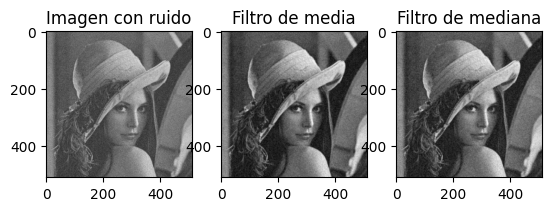

In [16]:
# Filtro de media
def filtro_media(imagen, kernel_size):
    imagen_filtrada = np.zeros_like(imagen)
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            imagen_filtrada[i, j] = np.mean(imagen[i-kernel_size[0]//2:i+kernel_size[0]//2+1, j-kernel_size[1]//2:j+kernel_size[1]//2+1])
    return imagen_filtrada

# Filtro de mediana
def filtro_mediana(imagen, kernel_size):
    imagen_filtrada = np.zeros_like(imagen)
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            imagen_filtrada[i, j] = np.median(imagen[i-kernel_size[0]//2:i+kernel_size[0]//2+1, j-kernel_size[1]//2:j+kernel_size[1]//2+1])
    return imagen_filtrada

# Comparación de filtros
imagen_ruidosa = agregar_ruido(dataset[0])

imagen_media = filtro_media(imagen_ruidosa, kernel_size)
imagen_mediana = filtro_mediana(imagen_ruidosa, kernel_size)

plt.subplot(131)
plt.imshow(imagen_ruidosa, cmap='gray')
plt.title('Imagen con ruido')

plt.subplot(132)
plt.imshow(imagen_media, cmap='gray')
plt.title('Filtro de media')

plt.subplot(133)
plt.imshow(imagen_mediana, cmap='gray')
plt.title('Filtro de mediana')